In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, preprocessing, decomposition, model_selection
from sklearn import ensemble, naive_bayes, metrics
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from mlxtend import plotting
healthcare = pd.read_csv("/content/drive/MyDrive/Colab/healthcare-dataset-stroke-data.csv")
healthcare.dropna(inplace=True)
le = LabelEncoder()
healthcare.smoking_status = le.fit_transform(healthcare.smoking_status)
healthcare.gender = le.fit_transform(healthcare.gender)
healthcare.ever_married = le.fit_transform(healthcare.ever_married)
healthcare.work_type = le.fit_transform(healthcare.work_type)
healthcare.Residence_type = le.fit_transform(healthcare.Residence_type)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


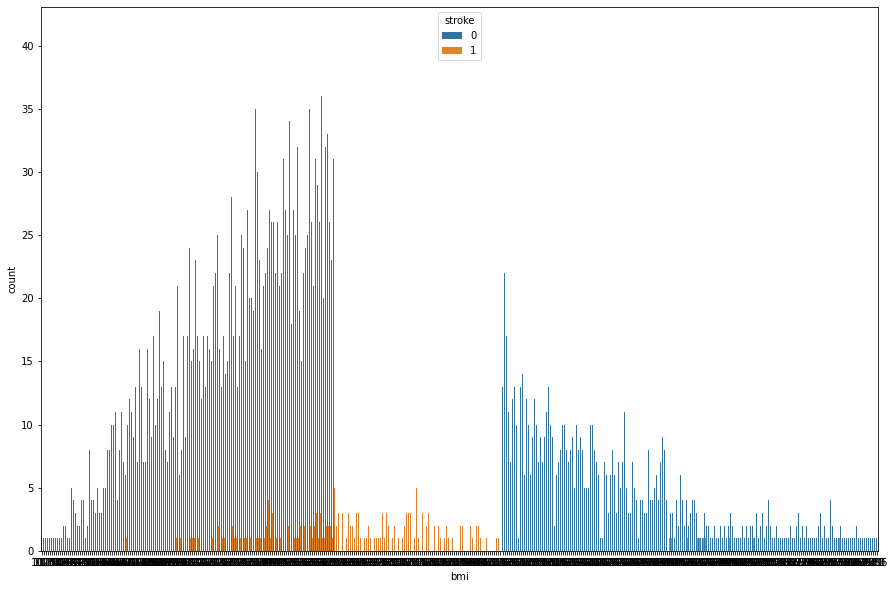

In [3]:
import seaborn as sns
fig, ax = pyplot.subplots(figsize=(15,10))
sns.countplot(healthcare['bmi'], hue=healthcare['stroke'],ax = ax)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


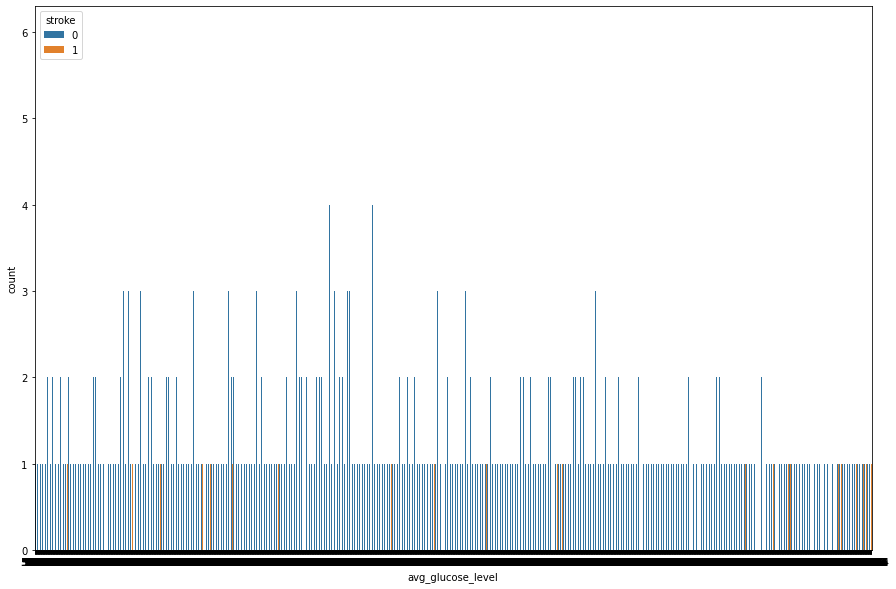

In [11]:
import seaborn as sns
fig, ax = pyplot.subplots(figsize=(15,10))
sns.countplot(healthcare['age'], hue=healthcare['stroke'],ax = ax)

In [ ]:
myList = [row for row in healthcare.values]
myArr = np.array(myList)
X_train, X_test, y_train, y_test = model_selection.train_test_split(myArr[:, 1:11], myArr[:, 11], test_size=0.33, random_state=42)
y_train = y_train.astype('int64')
X_train = X_train.astype('float64')
y_test = y_test.astype('int64')
X_test = X_test.astype('float64')
pca = decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(myArr[:, 1:11])
Xpca_train, Xpca_test, ypca_train, ypca_test = model_selection.train_test_split(X_pca, myArr[:, 11], test_size=0.33, random_state=42)
ypca_train = ypca_train.astype('int64')
Xpca_train = Xpca_train.astype('float64')
ypca_test = ypca_test.astype('int64')
Xpca_test = Xpca_test.astype('float64')
# print(myArr[:, 2:9:6])
# print(X_train, X_test, y_train, y_test)
# print(Xpca_train, Xpca_test, ypca_train, ypca_test)

In [ ]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
plotting.plot_decision_regions(X_test, y_test, clf = rfc)

In [ ]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(Xpca_train, ypca_train)
plotting.plot_decision_regions(Xpca_test, ypca_test, clf = rfc)

In [ ]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
plotting.plot_decision_regions(X_test, y_test, clf = gnb)

In [ ]:
gnb = naive_bayes.GaussianNB()
gnb.fit(Xpca_train, ypca_train)
plotting.plot_decision_regions(Xpca_test, ypca_test, clf = gnb)

In [ ]:
# iris = datasets.load_iris()
# arr = np.concatenate([iris.data, iris.target[:, None]], axis = 1)
# arr = np.array([x for x in arr if x[4] != 0])
# arr[:, 4] = arr[:, 4] - 1
# iris.data = arr[:, 0:2]
# iris.target = arr[:, 4].astype(np.integer)
# X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

In [ ]:
rfc.fit(X_train, y_train)
plotting.plot_decision_regions(X_test, y_test, clf = rfc)

In [ ]:
gnb.fit(X_train, y_train)
plotting.plot_decision_regions(X_test, y_test, clf = gnb)

In [ ]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)

rfc_posi = rfc.predict_proba(X_test)[:, 1]
gnb_posi = gnb.predict_proba(X_test)[:, 1]
rfc_fp, rfc_tp, rfc_ts = metrics.roc_curve(y_test, rfc_posi)
gnb_fp, gnb_tp, gnb_ts = metrics.roc_curve(y_test, gnb_posi)

auc_rfc = metrics.auc(rfc_fp, rfc_tp)
auc_gnb = metrics.auc(gnb_fp, gnb_tp)
pyplot.plot(rfc_fp, rfc_tp, color = "green", label = "Random Forest(auc = %0.2f" %auc_rfc)
pyplot.plot(gnb_fp, gnb_tp, color = "blue", label = "Gaussain Naive Bayes(auc = %0.2f" %auc_gnb)
pyplot.plot([0, 1],[0, 1], linestyle = "--")
pyplot.legend(loc = 4)

In [ ]:
 ## new ##
 ## new ##
import numpy as np
import pandas as pd
from sklearn import datasets, preprocessing, decomposition, model_selection
from sklearn import ensemble, naive_bayes, metrics
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from mlxtend import plotting
healthcare = pd.read_csv("/content/drive/MyDrive/Colab/healthcare-dataset-stroke-data.csv")
healthcare.dropna(inplace=True)
le = LabelEncoder()
healthcare.smoking_status = le.fit_transform(healthcare.smoking_status)
healthcare.gender = le.fit_transform(healthcare.gender)
healthcare.ever_married = le.fit_transform(healthcare.ever_married)
healthcare.work_type = le.fit_transform(healthcare.work_type)
healthcare.Residence_type = le.fit_transform(healthcare.Residence_type)

myList = [row for row in healthcare.values]
myArr = np.array(myList)
X_train, X_test, y_train, y_test = model_selection.train_test_split(myArr[:, 1:11], myArr[:, 11], test_size=0.33, random_state=42)
y_train = y_train.astype('int64')
X_train = X_train.astype('float64')
y_test = y_test.astype('int64')
X_test = X_test.astype('float64')
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(myArr[:, 1:11])
Xpca_train, Xpca_test, ypca_train, ypca_test = model_selection.train_test_split(X_pca, myArr[:, 11], test_size=0.33, random_state=42)
ypca_train = ypca_train.astype('int64')
Xpca_train = Xpca_train.astype('float64')
ypca_test = ypca_test.astype('int64')
Xpca_test = Xpca_test.astype('float64')

In [ ]:
from sklearn.metrics import *
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)
## 輸出其在訓練數據和驗證數據集上的預測精度
rfc_lab = rfc.predict(X_train)
rfc_pre = rfc.predict(X_test)
# print("随机森林的OOB score:",rfc.oob_score)
print("訓練數據集上的精度:",accuracy_score(y_train,rfc_lab))
print("驗證數據集上的精度:",accuracy_score(y_test,rfc_pre))

# rf_auc = metrics.roc_auc_score(y_test,rfc_pre, multi_class = 'ovr')
# print("***",rf_auc)

gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
gnb_lab = gnb.predict(X_train)
gnb_pre = gnb.predict(X_test)
print("\n訓練數據集上的精度:",accuracy_score(y_train,gnb_lab))
print("驗證數據集上的精度:",accuracy_score(y_test,gnb_pre))

# gn_auc = metrics.roc_auc_score(y_test,gnb_pre, multi_class = 'ovr')
# print("***",gn_auc)

In [ ]:
from sklearn import tree
from sklearn import neural_network
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_posi = rfc.predict_proba(X_test)[:, 1]
rfc_fp, rfc_tp, rfc_ts = metrics.roc_curve(y_test, rfc_posi)
rfc_pd = rfc.predict(X_test)
print("Random Forest confusion_matrix：")
print(metrics.confusion_matrix(y_true = y_test, y_pred = rfc_pd))
print(metrics.classification_report(y_true = y_test, y_pred = rfc_pd))


gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
gnb_posi = gnb.predict_proba(X_test)[:, 1]
gnb_fp, gnb_tp, gnb_ts = metrics.roc_curve(y_test, gnb_posi)
gnb_pd = gnb.predict(X_test)
print("Bayes confusion_matrix：")
print(metrics.confusion_matrix(y_true = y_test, y_pred = gnb_pd))
print(metrics.classification_report(y_true = y_test, y_pred = gnb_pd))

# metrics.confusion_matrix(y_true = y_test, y_pred = rfc.predict(X_test))
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_posi = dtc.predict_proba(X_test)[:, 1]
dtc_fp, dtc_tp, dtc_ts = metrics.roc_curve(y_test, dtc_posi)
dtc_pd = dtc.predict(X_test)

auc_rfc = metrics.auc(rfc_fp, rfc_tp)
auc_gnb = metrics.auc(gnb_fp, gnb_tp)
auc_dtc = metrics.auc(dtc_fp, dtc_tp)

mms = preprocessing.MinMaxScaler() #讓資料變百分比去比較
mlp = neural_network.MLPClassifier()
df_arr = pd.DataFrame(mms.fit_transform(myArr[:, 1:11])) #資料標準化
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_arr, myArr[:, 11], test_size=0.2, random_state=42) #資料切割
mlp.fit(X_train, y_train)
mlp_posi = mlp.predict_proba(X_test)[:, 1]
mlp_fp, mlp_tp, mlp_ts = metrics.roc_curve(y_test, mlp_posi)
mlp_pd = mlp.predict(X_test) #進行預測

auc_mlp = metrics.auc(mlp_fp, mlp_tp)


pyplot.xlabel("False Positive rate", fontsize = 15)
pyplot.ylabel("True Positive rate", fontsize = 15)

pyplot.plot(rfc_fp, rfc_tp, color = "green", label = "Random Forest(auc = %0.2f)" %auc_rfc)
pyplot.plot(gnb_fp, gnb_tp, color = "blue", label = "Gaussain Naive Bayes(auc = %0.2f)" %auc_gnb)
pyplot.plot(dtc_fp, dtc_tp, color = "orange", label = "DecisionTree(auc = %0.2f)" %auc_dtc)
pyplot.plot(mlp_fp, mlp_tp, color = "red", label = "ANN(auc = %0.2f)" %auc_mlp)

pyplot.plot([0, 1],[0, 1], linestyle = "--")
pyplot.legend(loc = 4)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=[0,1,2,3,4])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 